In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [30]:
def generate(n):
    A = np.random.rand(n,n)
    return A@A.T

In [31]:
def clgsQR(A):
    (m,n) = np.shape(A);
    Q = np.zeros((m,n));
    R = np.zeros((n,n));

    for j in np.arange(n):
        V = A[:,j];
        for i in np.arange(j):
            R[i,j] = Q[:,i].dot(A[:,j]); # a função np.dot realiza produto interno quando temos dois vetores e multiplicação de matriz quando temos duas matrizes
            V = V - R[i,j]*Q[:,i];
        R[j,j] = np.linalg.norm(V);
        Q[:,j] = V/R[j,j];

    return Q,R

In [32]:
def mgsQR(A):
    (m,n) = np.shape(A);
    V = np.copy(A); # já incializa V = A pois a primeira coluna de V será a primeira de A e precisamos salvar e acessar os valores de V
    Q = np.zeros((m,n));
    R = np.zeros((n,n));

    for j in np.arange(n):
        for i in np.arange(j):
            R[i,j] = Q[:,i].dot(V[:,j]); # não uso mais A, pois agora está tudo em V e já vou atualizando
            V[:,j] = V[:,j] - R[i,j]*Q[:,i];
        R[j,j] = np.linalg.norm(V[:,j]);
        Q[:,j] = V[:,j]/R[j,j];

    return Q,R

In [33]:
def francis_fiscal(A,tol,flag='python'):
    if flag == 'classico':
        print('QR',flag,'\n')
        qr = clgsQR;
    if flag == 'modificado':
        print('QR',flag,'\n')
        qr = mgsQR;
    if flag == 'python':
        print('QR',flag,'\n')
        qr = np.linalg.qr;
    
    n = np.shape(A)[0];
    A_local = np.copy(A);
    V = np.eye(n);
    erro = np.inf

    while erro > tol:
        [Q,R] = qr(A_local);
        A_local = R.dot(Q);
        V = V.dot(Q);

        erro = np.max(np.max(np.abs(np.tril(A_local,-1))));
    
    D = np.diag(A_local);

    return V, D

In [35]:
def my_francis(A, eps):
    A = A.copy()
    V = np.eye(len(A))
    
    it = 0
    while(np.max(np.absolute(np.tril(A, -1))) > eps):
        Q, R = np.linalg.qr(A)
        A = R@Q
        V = V@Q
        it += 1
    
    return V, np.diag(A)

In [36]:
def svd(A, eps, francis=my_francis):
    U, _ = francis(A@A.T, eps)
    V, D = francis(A.T@A, eps)
    
    S = np.diag(np.sqrt(D))
    return U, S, V

In [37]:
def svd_sim(A, eps, francis=my_francis):
    V, D = francis(A.T@A, eps)
    
    S = np.diag(np.sqrt(D))
    return V, S, V

In [38]:
A = generate(150)

## SVD não simétrico

### Nosso

In [47]:
%%time
U, S, V = svd(A, 1e-02, francis=my_francis)

CPU times: user 43 s, sys: 31.3 s, total: 1min 14s
Wall time: 26.7 s


### Monitora

In [48]:
%%time
Um, Sm, Vm = svd(A, 1e-02, francis=francis_fiscal)

QR python 

QR python 

CPU times: user 45.1 s, sys: 33.5 s, total: 1min 18s
Wall time: 30.4 s


### Python

In [49]:
%%time
Up, Sp, Vp = np.linalg.svd(A)

CPU times: user 63.7 ms, sys: 87.3 ms, total: 151 ms
Wall time: 80 ms


### Comparação

In [50]:
Up - Um

array([[-1.66109145e-01,  2.85402294e-01, -4.13852342e-02, ...,
         1.64414539e-07,  1.01040504e-01,  1.28551698e-06],
       [-1.66689971e-01,  1.67480223e-02,  6.61109883e-02, ...,
         1.58565201e-07, -9.27003393e-02, -1.14332028e-06],
       [-1.57866431e-01, -1.41216788e-01,  3.81202082e-02, ...,
        -3.66939169e-07, -2.90958812e-01, -3.55976374e-06],
       ...,
       [-1.62783100e-01,  1.22960563e-01, -8.81697137e-02, ...,
        -7.86314981e-08, -3.95750426e-05, -9.19155700e-08],
       [-1.58414705e-01, -2.93264165e-01,  1.59895191e-02, ...,
         5.54577447e-08,  5.19828927e-02,  9.87736736e-07],
       [-1.82332701e-01, -2.01496154e-01, -7.76990540e-02, ...,
         6.56660745e-08, -1.06052136e-01, -1.47226127e-06]])

In [53]:
Up - U

array([[-1.66109145e-01,  2.85402294e-01, -4.13852342e-02, ...,
         1.64414539e-07,  1.01040504e-01,  1.28551698e-06],
       [-1.66689971e-01,  1.67480223e-02,  6.61109883e-02, ...,
         1.58565201e-07, -9.27003393e-02, -1.14332028e-06],
       [-1.57866431e-01, -1.41216788e-01,  3.81202082e-02, ...,
        -3.66939169e-07, -2.90958812e-01, -3.55976374e-06],
       ...,
       [-1.62783100e-01,  1.22960563e-01, -8.81697137e-02, ...,
        -7.86314981e-08, -3.95750426e-05, -9.19155700e-08],
       [-1.58414705e-01, -2.93264165e-01,  1.59895191e-02, ...,
         5.54577447e-08,  5.19828927e-02,  9.87736736e-07],
       [-1.82332701e-01, -2.01496154e-01, -7.76990540e-02, ...,
         6.56660745e-08, -1.06052136e-01, -1.47226127e-06]])

In [54]:
Um == U

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

## SVD Simétrico

### Nosso

In [43]:
%%time
U, S, V = svd_sim(A, 1e-02, francis=my_francis)

CPU times: user 20.5 s, sys: 14.4 s, total: 34.9 s
Wall time: 12.8 s


### Monitora

In [44]:
%%time
U, S, V = svd_sim(A, 1e-02, francis=francis_fiscal)

QR python 

CPU times: user 20.8 s, sys: 14.7 s, total: 35.5 s
Wall time: 13.2 s


### Python

In [45]:
%%time
Up, Sp, Vp = np.linalg.svd(A)

CPU times: user 36.7 ms, sys: 34.7 ms, total: 71.4 ms
Wall time: 32.6 ms


In [10]:
img = plt.imread('images/fera.jpg', 'jpg')
img = rgb2gray(img)

In [38]:
%%time
U,S,V = np.linalg.svd(img)

CPU times: user 2min 21s, sys: 40.3 s, total: 3min 1s
Wall time: 1min 8s


In [39]:
k = min(img.shape)
k = 50
img_comp = U[:, : k]@np.diag(S)[: k, : k]@V[: k, :]

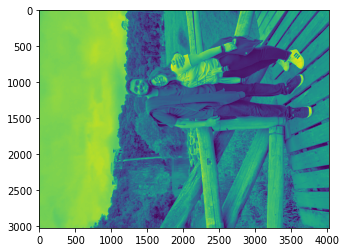

In [40]:
plt.imshow(img)

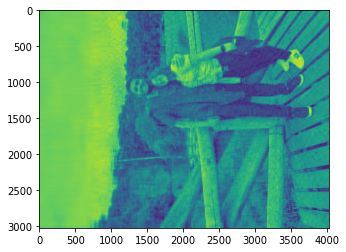

In [41]:
plt.imshow(img_comp)

In [ ]:
# -*- coding: utf-8 -*-
"""QRFrancisAtendimento8maio.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1l41qtZY1BDIc6onA_VVuDR4mWHIZZAlT

Definindo uma função para imprimir matrizes bonitinhas
"""

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
    print("\n")

import numpy as np
import math as m

import numpy as np
import math as m

A = np.array([[1,2],  
              [1,3],  
              [-2,0]], dtype='double')
matprint(A);

# (linhas,colunas) = np.shape(A)
# print(linhas)
# print(colunas)

# Q = np.zeros((3,2))
# Q[:,0] = [1,2,3]
# matprint(Q)

# print(Q[:,0].dot(A[:,1]))
# print(np.linalg.norm(Q[:,0]/(np.linalg.norm(Q[:,0]))))

"""# Decomposição QR - Implementação"""





# Testando a decomposição QR clássica
matprint(A)

(Q,R) = clgsQR(A);
matprint(Q)
matprint(R)
matprint(Q.dot(R))

# Testando decomposição QR modificada
(Q_mod,R_mod) = mgsQR(A)
matprint(Q_mod)
matprint(R_mod)
matprint(Q_mod.dot(R_mod))

# Comparando com a do Python
(Q_python,R_python) = np.linalg.qr(A)
matprint(Q_python)
matprint(R_python)
matprint(Q_python.dot(R_python))

"""Fazendo exemplo dos slides"""

B = np.array([[1, 1, 0],  
              [0, 1, 2],  
              [1, 0, 1],
              [0, 1, 3]], dtype='double')
matprint(B)
(m,n) = np.shape(B);

print('Calculando decomposição QR clássica\n')
(Q_c,R_c) = clgsQR(B);
matprint(Q_c); matprint(R_c);

print('Calculando o erro da decomposição QR clássica')
B_calc = Q_c.dot(R_c); # matriz obtida com a decomposição
norm_B = np.linalg.norm(B-B_calc,'fro')
print('O erro da decomposição é: %.2e\n' %(norm_B))

print('Calculando o erro de ortogonalidade')
I_calc = np.transpose(Q_c).dot(Q_c);
I = np.eye(n);
norm_I = np.linalg.norm(I-I_calc,'fro')
print('O erro de ortogonalidade é: %.2e\n' %(norm_I))

input("\n")

print('\nTestando com outra matriz\n')
eps = np.finfo(float).eps
B_eps = np.array([[1  , 1  , 1  ],  
                  [eps, 0  , 0  ],  
                  [0  , eps, 0  ],
                  [0  , 0  , eps]], dtype='double')
matprint(B_eps)

print('Calculando decomposição QR clássica\n')
(Q_c_eps,R_c_eps) = clgsQR(B_eps);
matprint(Q_c_eps); matprint(R_c_eps);

print('Calculando o erro da decomposição QR clássica')
B_calc_eps = Q_c_eps.dot(R_c_eps); # matriz obtida com a decomposição
norm_B_eps = np.linalg.norm(B_eps-B_calc_eps,'fro')
print('O erro da decomposição é: %.2e\n' %(norm_B_eps))

print('Calculando o erro de ortogonalidade')
I_calc_eps = np.transpose(Q_c_eps).dot(Q_c_eps);
I = np.eye(n);
norm_I_eps = np.linalg.norm(I-I_calc_eps,'fro')
print('O erro de ortogonalidade é: %.2e\n' %(norm_I_eps))

input("\n")

print('Calculando decomposição QR modificada\n')
(Q_c_mod,R_c_mod) = mgsQR(B_eps);
matprint(Q_c_mod); matprint(R_c_mod);

print('Calculando o erro da decomposição QR modificada')
B_calc_eps_mod = Q_c_mod.dot(R_c_mod); # matriz obtida com a decomposição
norm_B_eps_mod = np.linalg.norm(B_eps-B_calc_eps_mod,'fro')
print('O erro da decomposição é: %.2e\n' %(norm_B_eps_mod))

print('Calculando o erro de ortogonalidade')
I_calc_eps_mod = np.transpose(Q_c_mod).dot(Q_c_mod);
I = np.eye(n);
norm_I_eps_mod = np.linalg.norm(I-I_calc_eps_mod,'fro')
print('O erro de ortogonalidade é: %.2e\n' %(norm_I_eps_mod))

"""# Método de Francis - Implementação"""



"""Fazendo um exemplo"""

# Criando uma matriz simétrica a partir da B que eu já defini
C = np.transpose(B).dot(B);
matprint(C)
n_c = np.shape(C)[0];

print('Calculando autovalores com método de Francis\n')

tol = 0.000001; flag = 'python';
(D,V) = francis(C,tol,flag);

matprint(V);
print(D);

print('\nChecando a ortogonalidade de V')

I_c = np.transpose(V).dot(V);
I = np.eye(n_c);
norm_I_c = np.linalg.norm(I-I_c,'fro')
print('O erro de ortogonalidade é: %.2e\n' %(norm_I_c))

input();

print('Calculando autovalores com função pronta do Python\n')
# matprint(C)

(D_python,V_python) = np.linalg.eig(C);

matprint(V_python);
print(D_python);

print('\nChecando a ortogonalidade de V_python')

I_python = np.transpose(V_python).dot(V_python);
I = np.eye(n_c);
norm_I_python = np.linalg.norm(I-I_python,'fro')
print('O erro de ortogonalidade é: %.2e\n' %(norm_I_python))